# Análisis de libros académicos  
## Integración, análisis y visualización de datos

**Proyecto:** Análisis de precios y disponibilidad de libros académicos  
**Curso:** Lenguaje de Programación II  
**Modalidad:** Trabajo colaborativo con Git y GitHub  
**Rol:** Integrante 3 – Integración, estructuración y análisis de datos  

---

### Descripción general

Este notebook corresponde a la **fase final del proyecto**, en la cual se integran,
limpian y analizan los datos obtenidos automáticamente por el equipo a partir de
distintas plataformas en línea.

La información utilizada fue recolectada previamente mediante:
- Técnicas de **web scraping** sobre sitios de libros académicos.
- **Consumo de APIs públicas** orientadas a información académica y bibliográfica.

El objetivo principal de esta etapa es transformar múltiples fuentes heterogéneas
en un **conjunto de datos estructurado**, que permita realizar análisis comparativos,
visualizaciones y apoyar la toma de decisiones de estudiantes e instituciones educativas.

---

### Alcance de este notebook

Este análisis **no realiza procesos de descarga directa** de información.
Se enfoca exclusivamente en:

- Integrar los datasets generados por los otros integrantes del equipo.
- Limpiar y normalizar la información recopilada.
- Estructurar los datos en formatos adecuados para análisis.
- Generar visualizaciones que faciliten la interpretación de resultados.
- Presentar conclusiones basadas en los datos obtenidos.


In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt

BASE_DIR = os.path.join("data", "processed")

## Fuentes de datos utilizadas

Los datos integrados en este análisis provienen de:

- **OpenLibrary**: información de títulos y autores
- **OpenAlex**: información académica y editorial
- **Crossref**: metadatos académicos y DOI

Cada fuente aporta información complementaria, lo que permite obtener una visión
más completa del panorama de libros académicos.


In [41]:
openlibrary = pd.read_csv(os.path.join(BASE_DIR, "openlibrary.csv"))
openalex = pd.read_csv(os.path.join(BASE_DIR, "openalex_books.csv"))
crossref = pd.read_csv(os.path.join(BASE_DIR, "crossref_books.csv"))

## Integración y normalización de datos

Dado que cada fuente presenta estructuras distintas, se realizó un proceso de:
- Normalización de columnas
- Unificación de estructuras
- Identificación de la fuente de origen


In [42]:
openlibrary_clean = openlibrary.rename(columns={"anio_publicacion": "anio"})
openlibrary_clean["editorial"] = None
openlibrary_clean["doi"] = None
openlibrary_clean["fuente"] = "OpenLibrary"
openlibrary_clean = openlibrary_clean[["titulo", "autor", "editorial", "anio", "doi", "fuente"]]

openalex_clean = openalex.rename(columns={"anio_publicacion": "anio"})
openalex_clean["autor"] = None
openalex_clean["doi"] = None
openalex_clean["fuente"] = "OpenAlex"
openalex_clean = openalex_clean[["titulo", "autor", "editorial", "anio", "doi", "fuente"]]

crossref_clean = crossref.copy()
crossref_clean["autor"] = None
crossref_clean["fuente"] = "Crossref"
crossref_clean = crossref_clean[["titulo", "autor", "editorial", "anio", "doi", "fuente"]]

dataset = pd.concat([openlibrary_clean, openalex_clean, crossref_clean], ignore_index=True)
dataset = dataset.drop_duplicates(subset="titulo")


## Dataset final integrado

El resultado es un conjunto de datos unificado que consolida la información
proveniente de todas las fuentes, listo para análisis y visualización.


In [44]:
dataset.to_csv(
    os.path.join(BASE_DIR, "libros_academicos_integrados.csv"),
    index=False
)

dataset.head()

,titulo,autor,editorial,anio,doi,fuente
0,Pythons' Autobiography by the Pythons,"Monty Python, Graham Chapman, John Cleese, Ter...",None,2003,None,OpenLibrary
1,El gran libro de Python,"Marco Buttu, EDIZIONI LSWR",None,2016,None,OpenLibrary
2,Aprende a programar con PYTHON,José Dimas Luján Castillo,None,2019,None,OpenLibrary
3,PYTHON. Curso práctico de formación,Juan Carlos Orós Cabello,None,2022,None,OpenLibrary
4,PYTHON 3 al descubierto 2º Edición,Arturo Fernández Montoro,None,2013,None,OpenLibrary


## Análisis exploratorio de los datos

A continuación, se presentan visualizaciones que permiten comprender mejor
la distribución y características de los libros académicos recopilados.


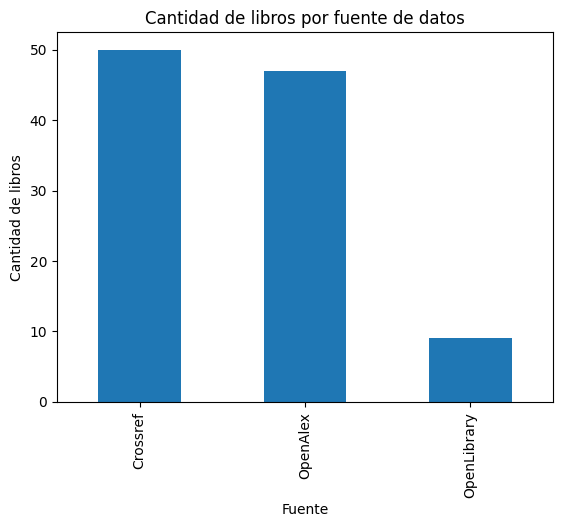

In [45]:
dataset["fuente"].value_counts().plot(kind="bar")
plt.title("Cantidad de libros por fuente de datos")
plt.xlabel("Fuente")
plt.ylabel("Cantidad de libros")
plt.show()


## Análisis exploratorio de los datos

A continuación, se presentan visualizaciones que permiten comprender mejor
la distribución y características de los libros académicos recopilados.

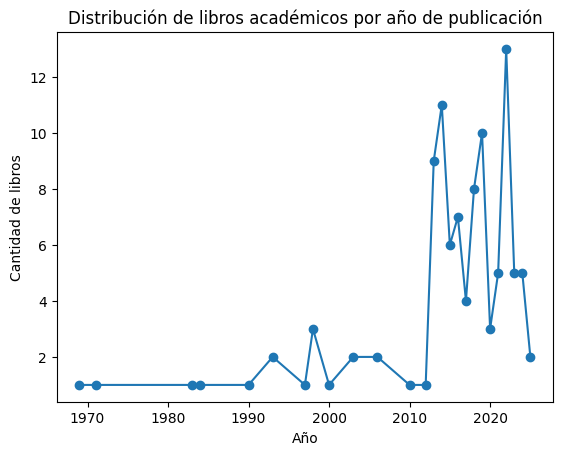

In [47]:
dataset["anio"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Distribución de libros académicos por año de publicación")
plt.xlabel("Año")
plt.ylabel("Cantidad de libros")
plt.show()

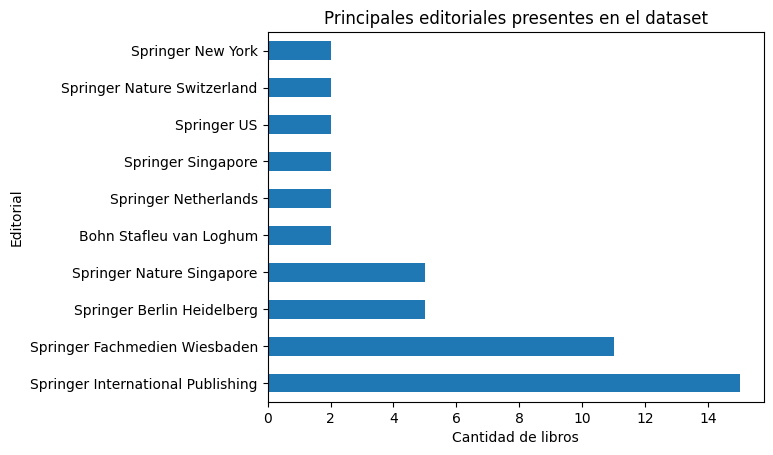

In [48]:
dataset["editorial"].value_counts().head(10).plot(kind="barh")
plt.title("Principales editoriales presentes en el dataset")
plt.xlabel("Cantidad de libros")
plt.ylabel("Editorial")
plt.show()

## Conclusion

Este proyecto evidencia un flujo completo de trabajo colaborativo:

- La recolección automatizada de datos mediante web scraping y consumo de APIs
  fue realizada por los integrantes del equipo encargados de esas tareas.
- La integración, limpieza y estructuración de los datos permitió transformar
  múltiples fuentes en un dataset unificado y analizable.
- El análisis exploratorio y las visualizaciones facilitan la comprensión de
  la disponibilidad y características de los libros académicos.

La correcta articulación entre las distintas etapas del proyecto demuestra
la importancia del trabajo en equipo para el desarrollo de soluciones de
análisis de datos completas y funcionales.